<a href="https://colab.research.google.com/github/SujitbMusale/Mobile-Price-Range-Prediction-classification/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.

Data Description -

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

# Importing data and data cleaning

In [1]:
# importing the required libarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# importing csv file.
Mob_data=pd.read_csv("/content/drive/MyDrive/almabetter/capston project/Supervised Machine Learning - Classification/data_mobile_price_range.csv")

In [4]:
Mob_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
# check data shape
Mob_data.shape

(2000, 21)

In [6]:
# lets check null value and variable type
Mob_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Whole data present in numeric varaible and also there is no any null value is the given data.

In [7]:
# lets chcek Data statics.
Mob_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Here we can see that sc_w and px_height has minimum value 0. it is not possible that mobile with 0 screen width and pixcel with 0 height.

In [8]:
# lets check the  count of zero value present in the both of this variable.
print(Mob_data[Mob_data['px_height']==0].shape[0])
print(Mob_data[Mob_data['sc_w']==0].shape[0])

2
180


So, px_height and sc_w are having 2 and 180 numbers of zero value respectively.
as px_height is just having 2 values as zero we can drop that rows easily.
and for sc_w we use Nearest Neighbour Imputations as Missing values are imputed using the k-Nearest Neighbors approach where a Euclidean distance is used to find the nearest neighbors.

In [9]:
# Dropping px_height
Mob_data=Mob_data[Mob_data['px_height']!=0]

In [10]:
# Lets replace 0 with NaN value to use KNN Imputer
Mob_data['sc_w']=Mob_data['sc_w'].replace(0,np.nan)

In [11]:
# use KNN Imputer by importing from sklearn
from sklearn.impute import KNNImputer
Mob_data=pd.DataFrame(KNNImputer(n_neighbors=1).fit_transform(Mob_data),columns=Mob_data.columns)

In [12]:
Mob_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1998 non-null   float64
 1   blue           1998 non-null   float64
 2   clock_speed    1998 non-null   float64
 3   dual_sim       1998 non-null   float64
 4   fc             1998 non-null   float64
 5   four_g         1998 non-null   float64
 6   int_memory     1998 non-null   float64
 7   m_dep          1998 non-null   float64
 8   mobile_wt      1998 non-null   float64
 9   n_cores        1998 non-null   float64
 10  pc             1998 non-null   float64
 11  px_height      1998 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1998 non-null   float64
 15  sc_w           1998 non-null   float64
 16  talk_time      1998 non-null   float64
 17  three_g        1998 non-null   float64
 18  touch_sc

In [13]:
# check for duplicate value
Mob_data.duplicated().sum()

0

AS there is no duplicate value and also no any null value so we are all set to perfom EDA.

#EDA

In [14]:
# lets check the target variable counts.
print(Mob_data['price_range'].value_counts())

2.0    500
0.0    500
1.0    499
3.0    499
Name: price_range, dtype: int64


In [15]:
Mob_data['price_range'].value_counts()

2.0    500
0.0    500
1.0    499
3.0    499
Name: price_range, dtype: int64

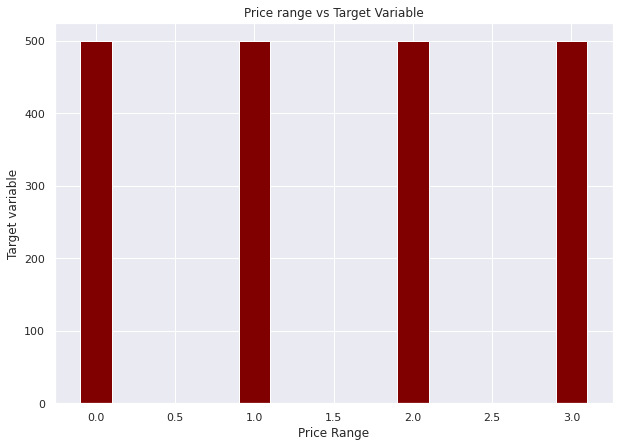

In [16]:
fig = plt.figure(figsize =(10, 7))
plt.bar( Mob_data['price_range'],color ='maroon',width = 0.2,height=500)
plt.xlabel("Price Range")
plt.ylabel("Target variable")
plt.title("Price range vs Target Variable")
plt.show()

Here we can see that there is no Inbalanced in target variable.. as all values counts are almost equal

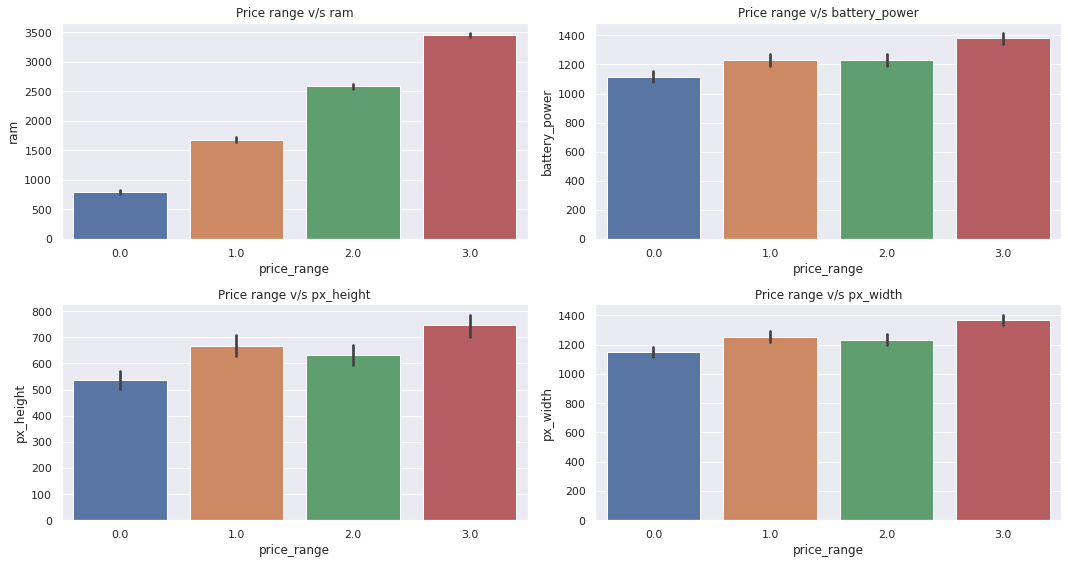

In [17]:
# plotting  price_range vs other fearures
plt.figure(figsize=(15,8))
x=1
variables=['ram','battery_power','px_height','px_width']
for var in variables:
  plt.subplot(2,2,x)
  sns.barplot(x=Mob_data['price_range'],y=Mob_data[var])
  plt.title(f'Price range v/s {var}')
  x=x+1
  plt.tight_layout()

* we can see that from 1st graph that as Ram incereaes price also increase 
so we can say that they are having positive corellation is exist between two variable.
* Also In 2nd graph battary power and price having positive relation between them.
* for Pixal height and pixel width also having positive relation but for price range 1 and 2 you can see pxal height and pixel width are not having any significant impact on mobile price.

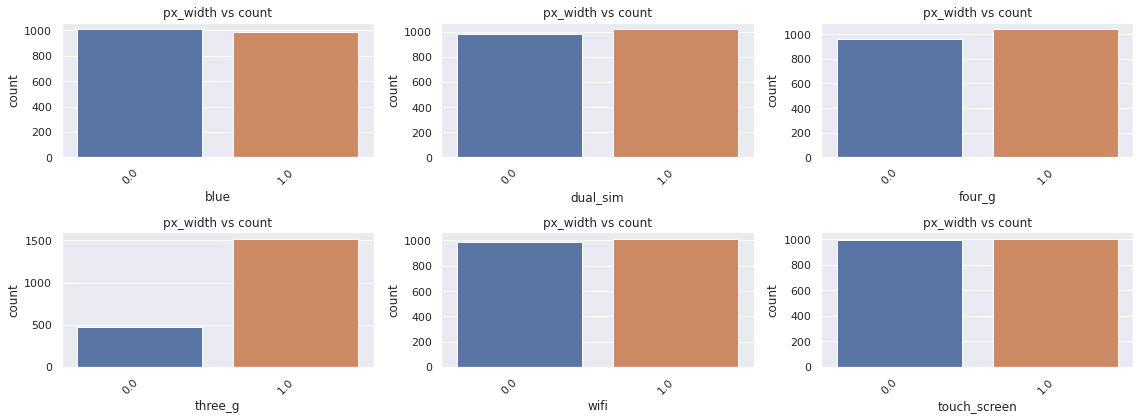

In [18]:
# univariate analysis of binary categorical variables
bin_var= ['blue','dual_sim','four_g','three_g','wifi','touch_screen']
i=1
fig = plt.figure(figsize= (16,6))
for col in (bin_var):
    ax=fig.add_subplot(2,3,i)
    sns.countplot(x=Mob_data[col], ax=ax)
    plt.xticks(rotation=45, ha='right')
    i=i+1
    plt.title(f'{var} vs count')
plt.tight_layout()
plt.show()

*  Here we can see that 1 means mobile has that specification and 0 means that specification is not avilable for that mobile.
*  here most of all binary variables are having 50% of the feature except three_g almost 25% features are not having three_g and 75% are having three_g.


In [19]:
# lets check the distribution of numerical column along with outliers
# lets take the numerical column list
n_col=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height',
             'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',]

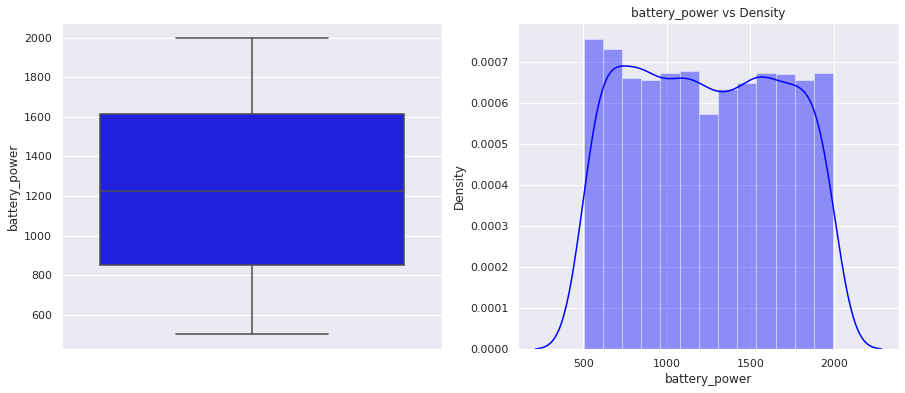

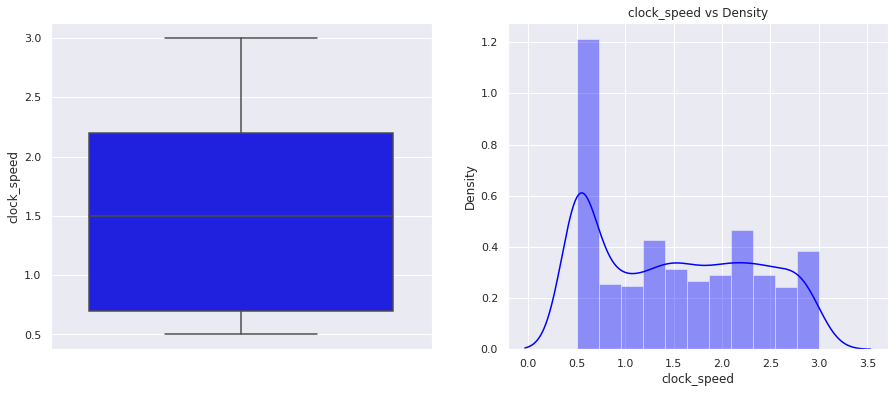

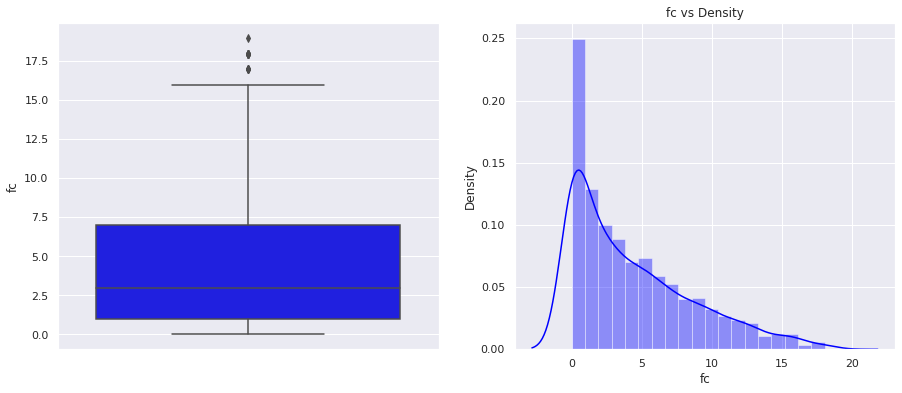

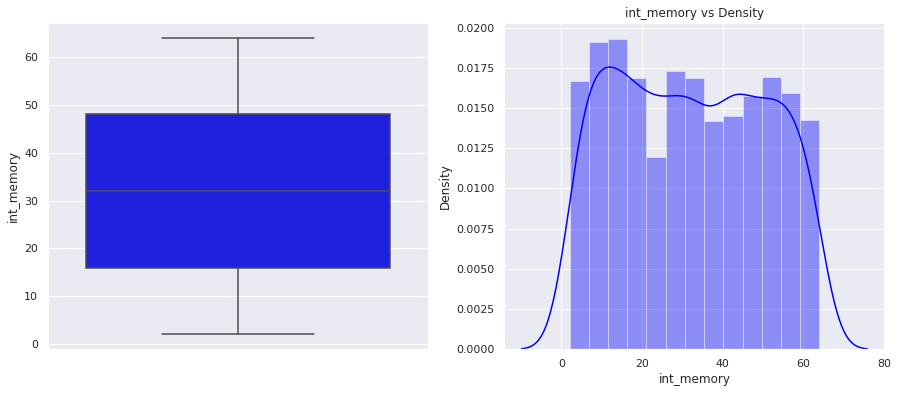

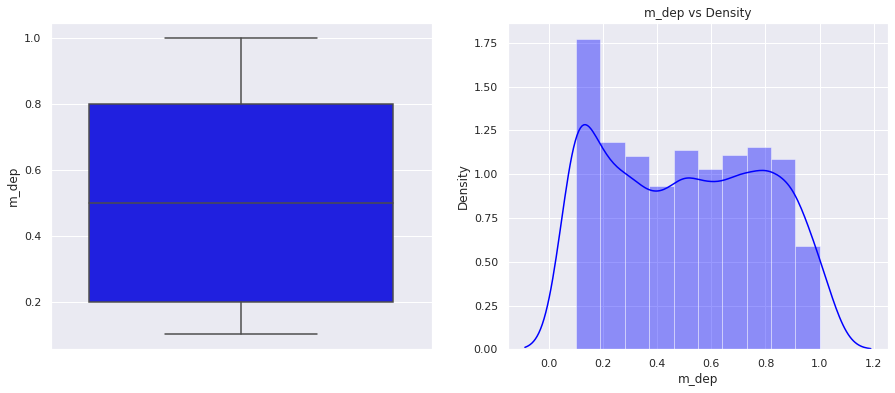

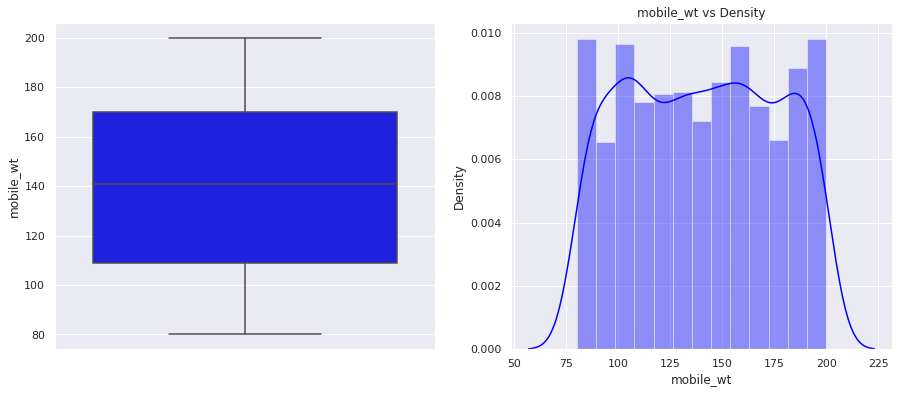

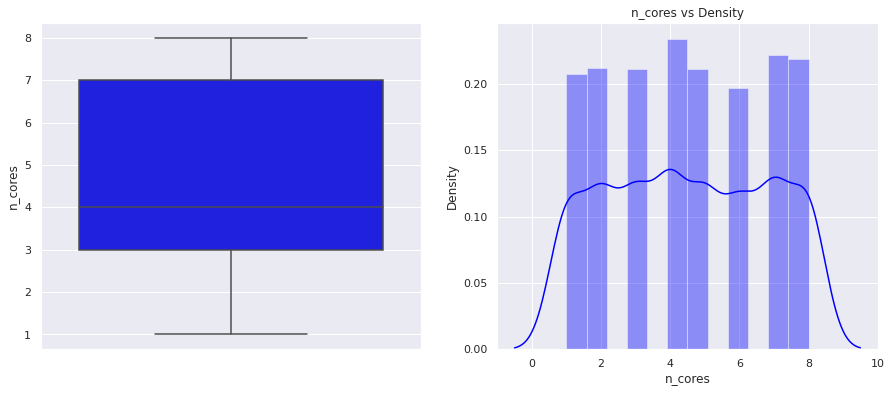

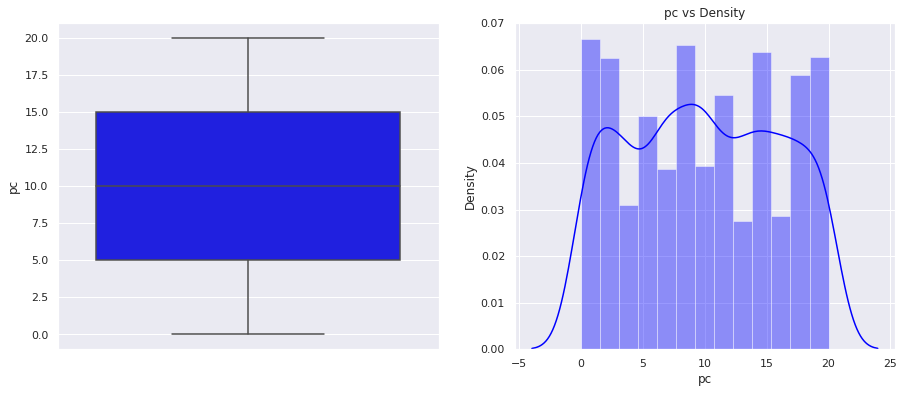

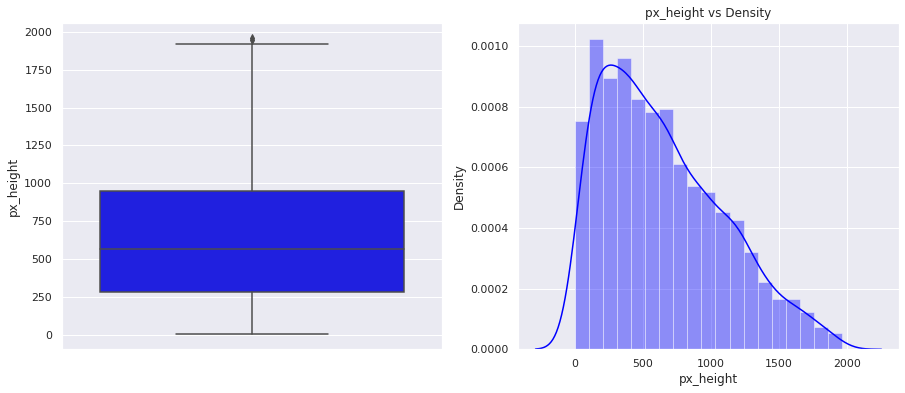

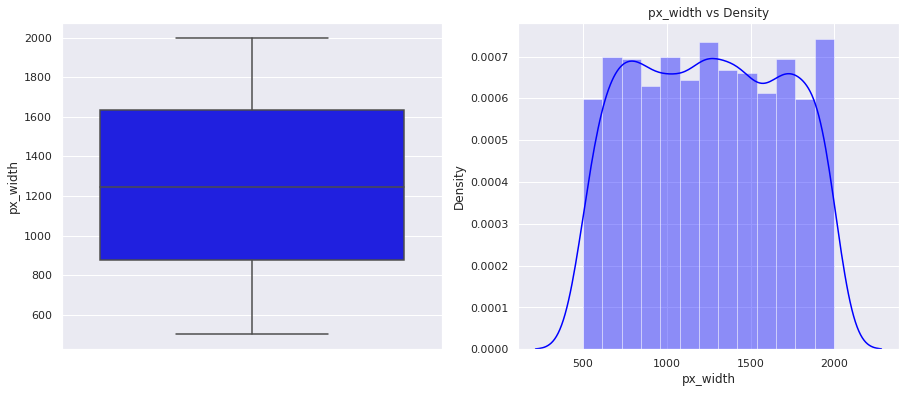

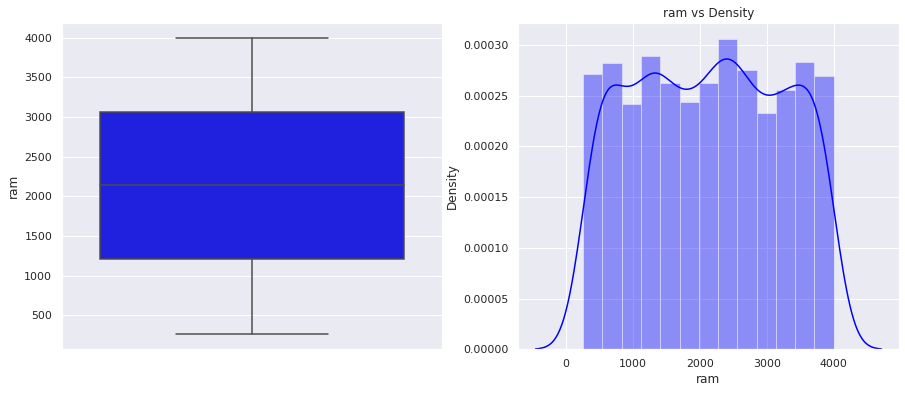

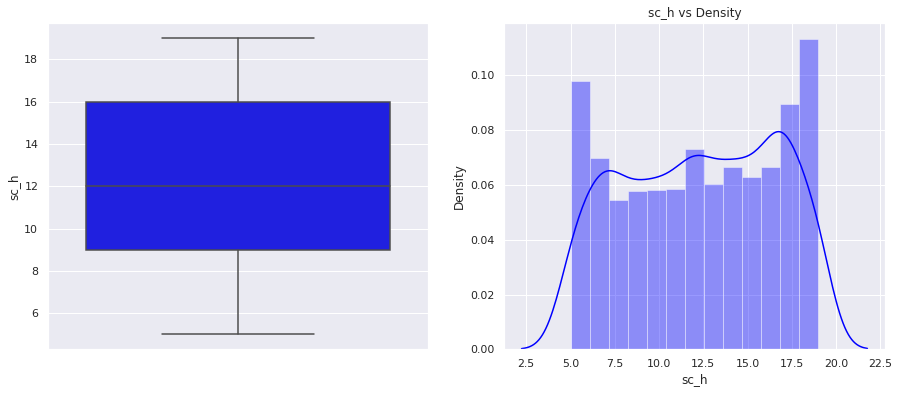

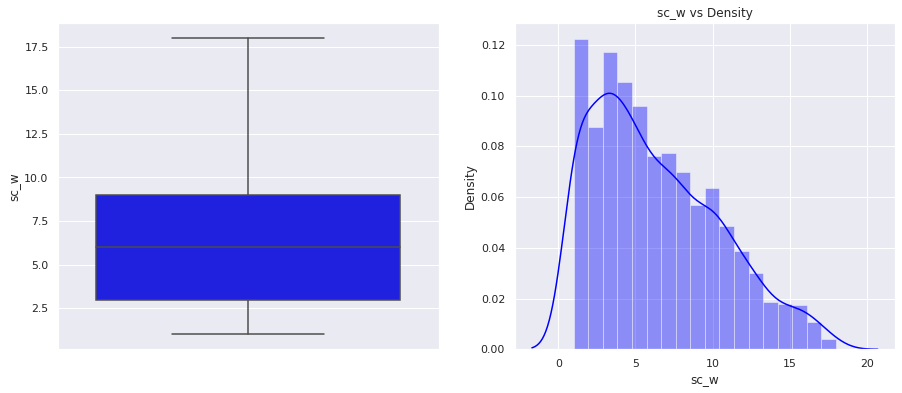

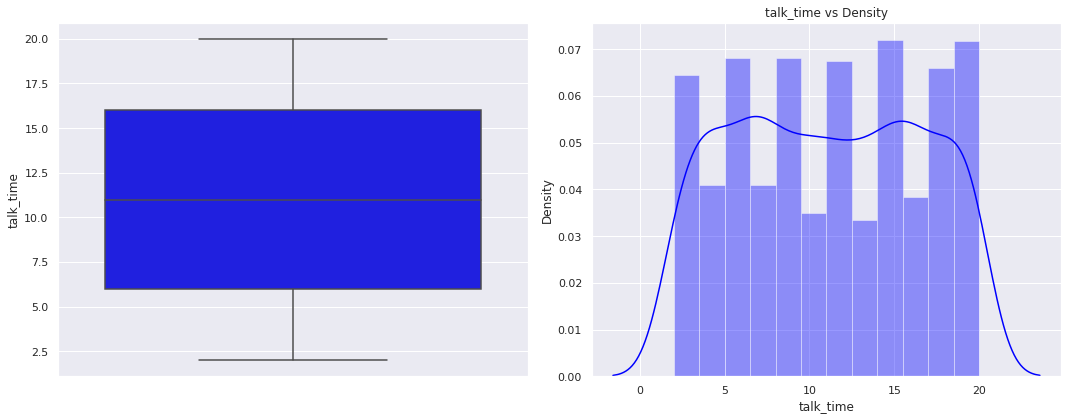

In [20]:
# plotting boXplot and distribution
for var in n_col:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 2)
    fig = sns.distplot(Mob_data[var],color='blue')
    fig.set_xlabel(var)
    fig.set_title(f'{var} vs Density')
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=Mob_data[var],color='blue')
    fig.set_ylabel(var)
plt.tight_layout()
plt.show()

Here we can see that px_height fc has some outliers.
otherwise data is well distributed.

In [21]:
# lets do oulier treatment here we can see only two type of feature are having outlier so we will drop that data which is coming after quartile.
# here data is having outlier at upper quartile only so we will drop only that data.
Mob_data = Mob_data[(Mob_data['fc'] <= Mob_data['fc'].quantile(0.991))]

In [22]:
Mob_data = Mob_data[(Mob_data['px_height'] <= Mob_data['px_height'].quantile(0.991))]

In [23]:
Mob_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1.0
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2.0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2.0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2.0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1.0


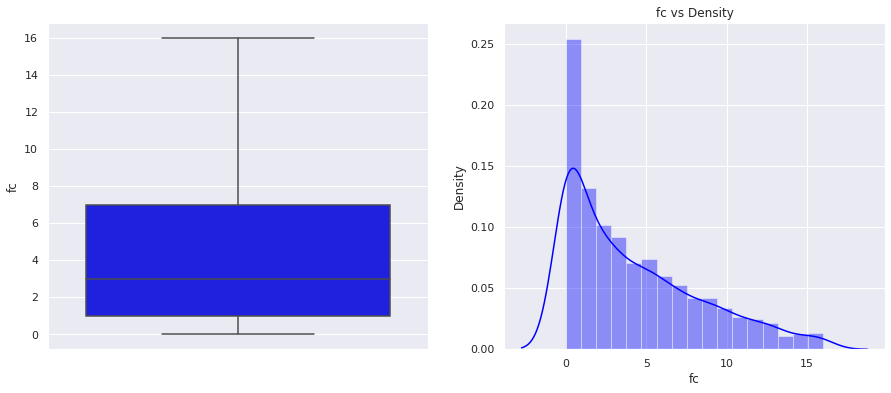

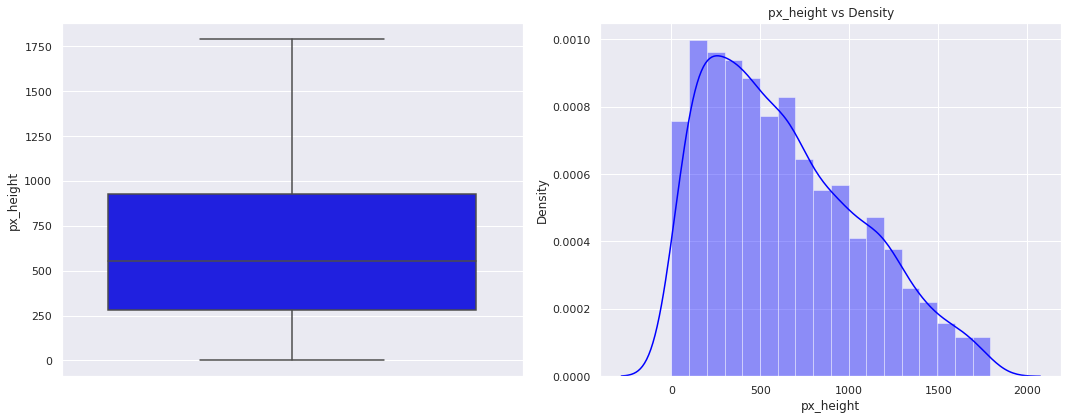

In [24]:
# lets have a cross check for outliers in both feature.
cross_n_col=['fc','px_height']
for var in cross_n_col:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 2)
    fig = sns.distplot(Mob_data[var],color='blue')
    fig.set_xlabel(var)
    fig.set_title(f'{var} vs Density')
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=Mob_data[var],color='blue')
    fig.set_ylabel(var)
plt.tight_layout()
plt.show()

Now we can see that the there is no outlier present

In [26]:
#from sklearn.feature_selection import mutual_info_classif


In [27]:
#mutual_info = mutual_info_classif(X, y)
#mutual_info = pd.Series(mutual_info)
#mutual_info.index = X.columns
#feature = mutual_info.sort_values(ascending=False)


In [28]:
#feature

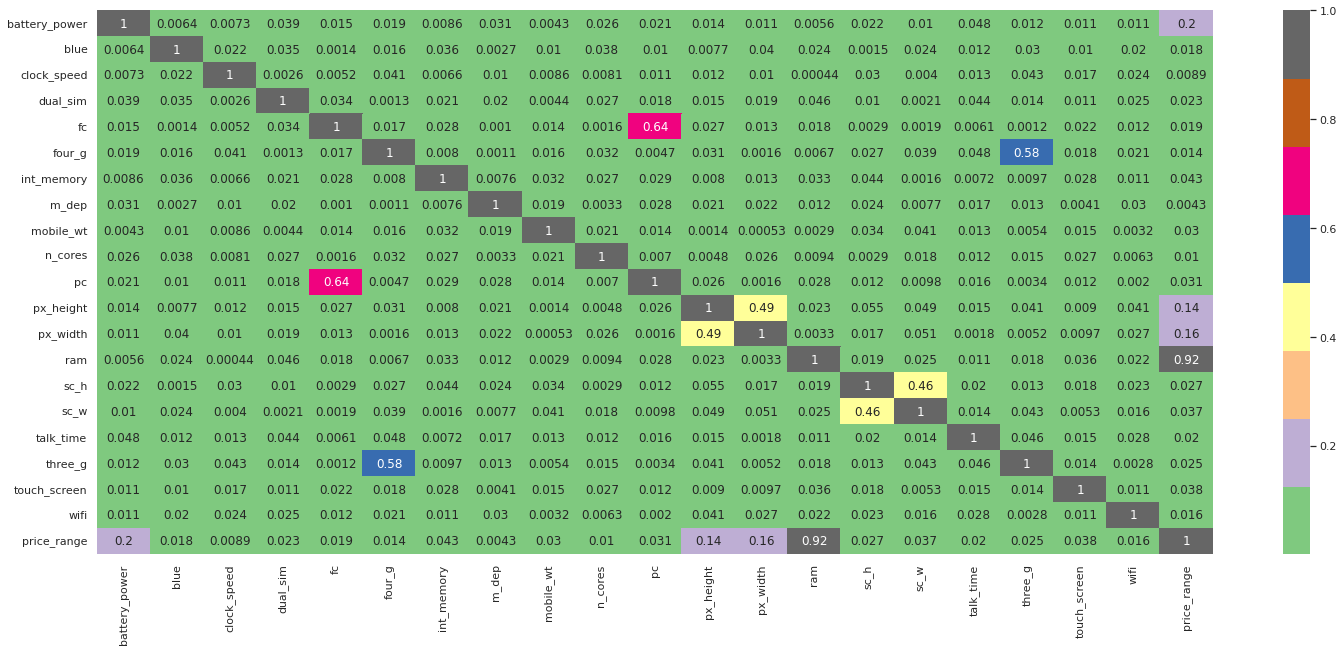

In [34]:
# lets check the correlation between variables by using heatmap.
plt.figure(figsize=(25,10))
sns.heatmap(data=abs(Mob_data.corr()),annot=True,cmap=plt.cm.Accent)

here we can see that some of the feature like four_g and three_g are correlated  and also pc and fc are also correlated but not highly.

# Modeling

In [35]:
# lets Separat X variables(indpendent variables) and Y(dependent variable) variable.
X=Mob_data.drop('price_range',axis=1)
y=Mob_data["price_range"]

In [36]:
# lets import libraries required for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix,confusion_matrix,roc_curve,roc_auc_score,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Decision Tree

In [39]:
# As we know the Decison tree is tree based model we will not required scaling for this.
# splitting the data into Train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [40]:
# Creating object of the decision tree.
DTC=DecisionTreeClassifier(random_state=0)

In [41]:
#Lets fit the training data
DTC.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [42]:
# Predicting y values of train data and test data.
y_train_pred=DTC.predict(X_train)
y_pred=DTC.predict(X_test)

In [43]:
# Checking train set accuracy.
accuracy_score(y_train,y_train_pred)

1.0

In [44]:
# Checking test set accuracy
accuracy_score(y_test,y_pred)

0.8472505091649695

[[125  13   0   0]
 [ 11  87  17   0]
 [  0  12 101   6]
 [  0   0  16 103]]


[Text(0, 0.5, 'low cost'),
 Text(0, 1.5, 'medium cost'),
 Text(0, 2.5, 'high cost'),
 Text(0, 3.5, 'very high cost')]

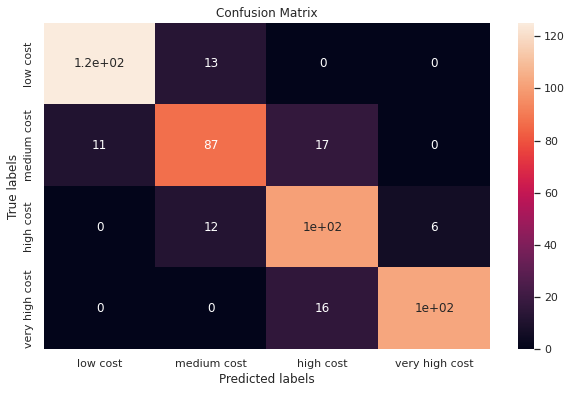

In [53]:
# Get the confusion matrix for both train and test
plt.figure(figsize=(10,6))
labels = ['low cost','medium cost', 'high cost', 'very high cost']
cm = confusion_matrix(y_test, y_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

as we can see that train set accuracy is 100% and test set accuracy is 84.72 %
we can say that model is overfitting to training data set. so, by using hyper parameter tuning we will reduce over fitting

In [54]:
# hyper parameter tuning.
# lets take following value for parameter grid values for hyper parameter tuning
grid_values={'criterion':['gini','entropy'],
             'max_depth':[2,3,4,5,6,9,10,11,12,13,14,15],
             'splitter':['best','random'],
             'min_samples_split':[3,5,10],
             'max_features':['auto','sqrt','log2',None]}

In [55]:
# applying GridSearchCv and fitting the model with it.
dtc_tune=GridSearchCV(DTC,param_grid=grid_values,cv=5,scoring='accuracy',verbose=3)
dtc_tune.fit(X_train,y_train) 

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.441 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.449 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.463 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.432 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.425 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.464 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.442 total time=   0.0s
[CV 3/5] END criterion=gini, 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14,
                                       15],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_split': [3, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [59]:
# getting best parameters for model.
dtc_tune.best_params_


{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': None,
 'min_samples_split': 3,
 'splitter': 'best'}

In [60]:
# getting best estimators
dtc_tune.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=3,
                       random_state=0)

In [61]:
# using best parameters and training the the data.
DTC_optimal=DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=0)
DTC_optimal.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=0)

In [62]:
# predicting y values of train and test set.
y_train_pred=DTC_optimal.predict(X_train)
y_pred=DTC_optimal.predict(X_test)

In [63]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

0.9782460910944936

In [64]:
# Checking the accuarcy score of test set.
accuracy_score(y_test,y_pred)

0.8391038696537678

[[129   9   0   0]
 [ 12  91  12   0]
 [  0  19  89  11]
 [  0   0  16 103]]


[Text(0, 0.5, 'low cost'),
 Text(0, 1.5, 'medium cost'),
 Text(0, 2.5, 'high cost'),
 Text(0, 3.5, 'very high cost')]

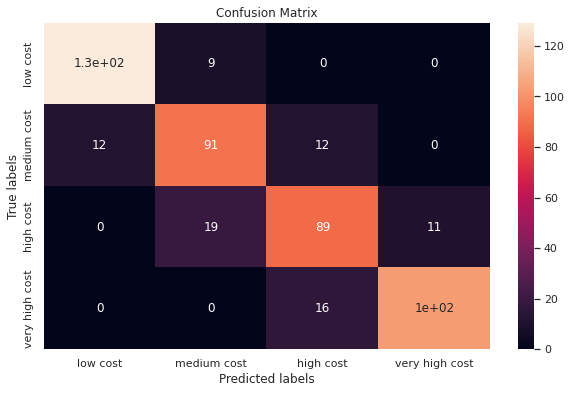

In [65]:
# Get the confusion matrix for both train and test
plt.figure(figsize=(10,6))
labels = ['low cost','medium cost', 'high cost', 'very high cost']
cm = confusion_matrix(y_test, y_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [68]:
# lets chcek with evaluation matrix which is used for classification
print('classification report for train data')
print(classification_report(y_train,y_train_pred))
print('classification report for test data')
print(classification_report(y_test,y_pred))

classification report for train data
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       356
         1.0       0.96      0.98      0.97       376
         2.0       0.98      0.97      0.98       372
         3.0       0.99      0.99      0.99       367

    accuracy                           0.98      1471
   macro avg       0.98      0.98      0.98      1471
weighted avg       0.98      0.98      0.98      1471

classification report for test data
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       138
         1.0       0.76      0.79      0.78       115
         2.0       0.76      0.75      0.75       119
         3.0       0.90      0.87      0.88       119

    accuracy                           0.84       491
   macro avg       0.84      0.83      0.84       491
weighted avg       0.84      0.84      0.84       491



In [69]:
# creating a function for plotting the feature importances.
def plot_feature_importance(algo):
  ''' Takes the alogorithm as input and 
  plots the feature importance graph'''
  importance = algo.feature_importances_
  feat_importance=pd.DataFrame({'Features':X.columns,'score':importance}).sort_values(by='score',ascending=False)
  plt.figure(figsize=(10,8))
  sns.barplot(x=feat_importance['score'],y=feat_importance['Features'])
  plt.title('Feature Importance')

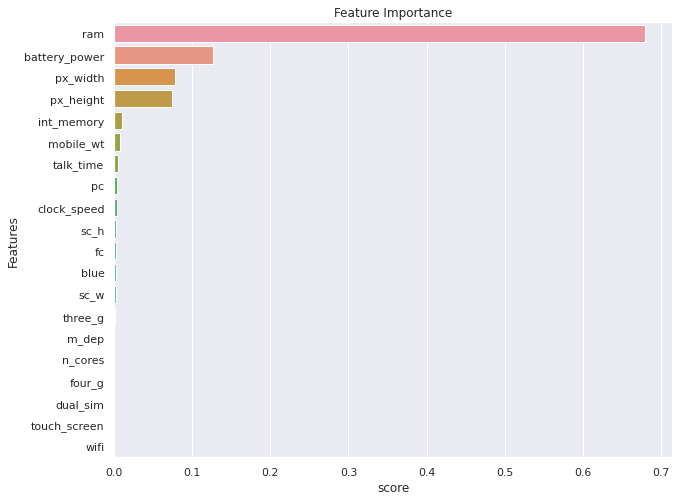

In [71]:
#plotting feature importances
plot_feature_importance(DTC_optimal)

In [77]:
# Calculate roc_auc score on train set
#pred_prob = DTC_optimal.predict_proba(X_test)
#roc_auc_score(y_pred_pred,pred_prob)